In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('Assignment2_Data.csv')
df.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,CrdY,CrdR
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19,38,36,2978,11,7,6,0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23,35,35,3063,5,0,8,1
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23,34,34,3060,0,0,1,0
3,Ben White,Arsenal,eng ENG,DF,23,32,32,2880,0,0,3,0
4,Martin Ødegaard,Arsenal,no NOR,MF,22,36,32,2785,7,4,4,0


# 4a. What is the distribution of players by age?

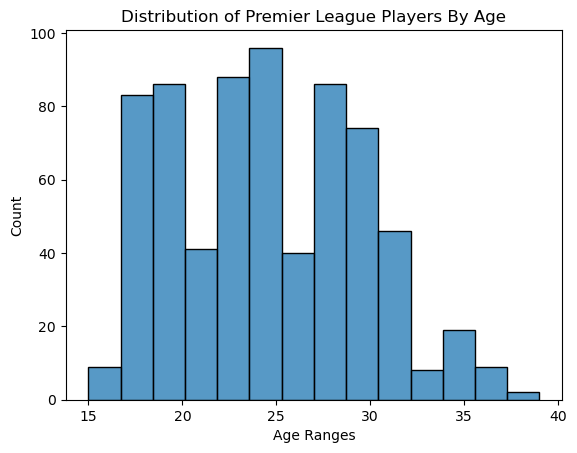

In [80]:
sns.histplot(data = df, x = 'Age')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Distribution of Premier League Players By Age')
plt.show()

# 4b. Is the majority of playes in the league English or non-English?

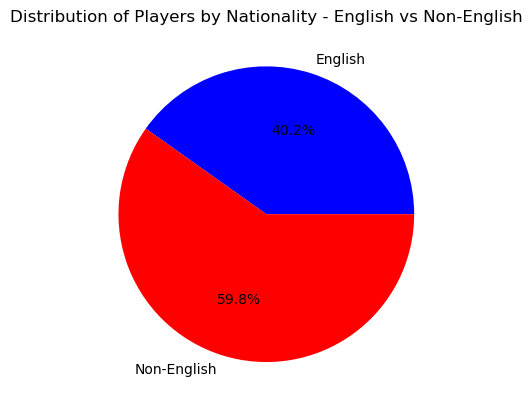

In [203]:
english_players = df[df['Nation'] == 'eng ENG']
non_english_players = df[df['Nation'] != 'eng ENG']

count_of_english_players = len(english_players)
count_of_non_english_players = len(non_english_players)

nationality_count = pd.DataFrame({
    'Nationality': ['English', 'Non-English'],
    'Count': [count_of_english_players, count_of_non_english_players]
})

plt.pie(nationality_count['Count'], labels = nationality_count['Nationality'], autopct = '%1.1f%%', colors = ['blue', 'red'])
plt.title('Distribution of Players by Nationality - English vs Non-English')
plt.show()

# 4c. For Forward players, is there a relationship between making assists and scoring goals?

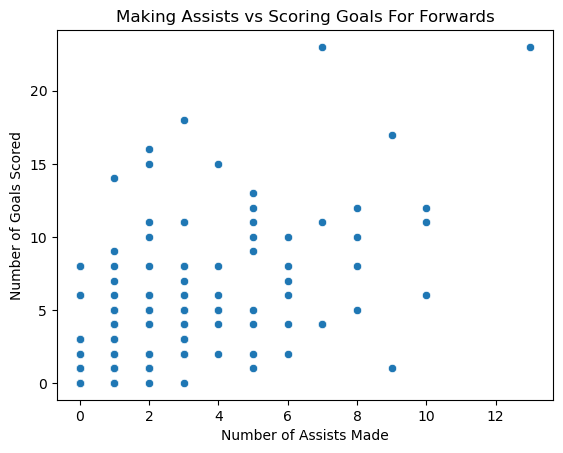

In [148]:
forwards = df[(df['Pos'] == 'FW') | (df['Pos'] == 'FW,MF') | (df['Pos'] == 'MF,FW')]
sns.scatterplot(data = forwards, x = 'Ast', y = 'Gls')
plt.xlabel('Number of Assists Made')
plt.ylabel('Number of Goals Scored')
plt.title('Making Assists vs Scoring Goals For Forwards')
plt.show()

From the graph above, it can be seen that, for forwards, the relationship between making assists and scoring goals for forwards is that as the number of assists made increases, the number of goals scored also increases. This indicates a directly proportional relationship between these two particular variables for forward players. However, this relationship is not strong, as indicated by the correlation coefficient below, which is 0.655, indicating an existing but weak correlation between the number of assists made and the number of goals scored by forward players. 

In [217]:
correlation = forwards['Ast'].corr(df['Gls'])
print(correlation)

0.6550318365944088


# 4d. For Forward players, do English players have a higher scoring efficiency or Non-English players?

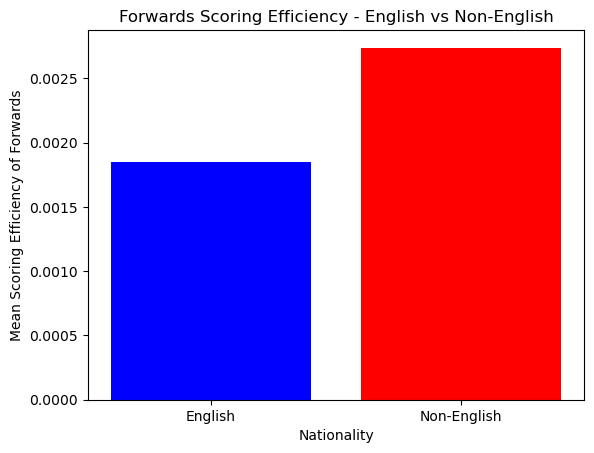

In [199]:
df['Scoring Efficiency'] = df['Gls'] / df['Min']

forwards = df[(df['Pos'] == 'FW') | (df['Pos'] == 'FW,MF') | (df['Pos'] == 'MF,FW')]

english_forwards = forwards[forwards['Nation'] == 'eng ENG']

mean_scoring_efficiency_english = english_forwards['Scoring Efficiency'].mean()

non_english_forwards = forwards[forwards['Nation'] != 'eng ENG']

mean_scoring_efficiency_non_english = non_english_forwards['Scoring Efficiency'].mean()

Nationalities = ['English', 'Non-English']

MeanScoringEfficiencies = [mean_scoring_efficiency_english, mean_scoring_efficiency_non_english]

plt.bar(Nationalities, MeanScoringEfficiencies, color = ['blue', 'red'])
plt.xlabel('Nationality')
plt.ylabel('Mean Scoring Efficiency of Forwards')
plt.title('Forwards Scoring Efficiency - English vs Non-English')
plt.show()

# 4e. Is there a relationship between getting yellow cards and getting red cards?

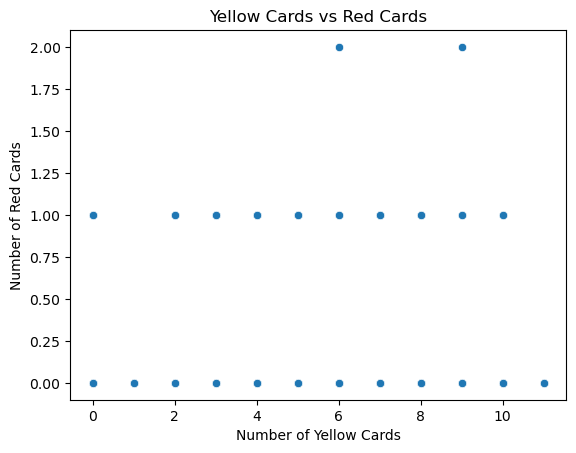

In [211]:
sns.scatterplot(data = df, x = 'CrdY', y = 'CrdR')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Number of Red Cards')
plt.title('Yellow Cards vs Red Cards')
plt.show()

From the graph above, it can be seen that there is no relationship between getting yellow cards and getting red cards. The graph is essentially horizantal lines which relfect no real correlation of one variable causing the other one to change. This is further supported by the correlation coefficient below, which is 0.316, which indicates a very weak to non-existent correlation between getting yellow cards and getting red cards. 

In [216]:
correlation_coefficient = df['CrdY'].corr(df['CrdR'])
print(correlation_coefficient)

0.3155812709555766
